# Datos Faltantes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [3]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
179,-0.023677,-0.044642,-0.015906,-0.012556,0.020446,0.041274,-0.043401,0.034309,0.014074,-0.009362,151.0
381,-0.070900,0.050680,-0.089197,-0.074527,-0.042848,-0.025739,-0.032356,-0.002592,-0.012909,-0.054925,104.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0
44,0.045341,0.050680,0.068163,0.008101,-0.016704,0.004636,-0.076536,0.071210,0.032432,-0.017646,259.0
127,0.034443,0.050680,-0.001895,-0.012556,0.038334,0.013717,0.078093,-0.039493,0.004548,-0.096346,109.0
385,0.023546,0.050680,-0.019140,0.049415,-0.063487,-0.061125,0.004460,-0.039493,-0.025953,-0.013504,219.0
357,-0.060003,0.050680,0.049840,0.018430,-0.016704,-0.030124,-0.017629,-0.002592,0.049770,-0.059067,221.0
178,0.041708,-0.044642,-0.008362,-0.026328,0.024574,0.016222,0.070730,-0.039493,-0.048359,-0.030072,81.0
300,0.016281,-0.044642,0.073552,-0.041235,-0.004321,-0.013527,-0.013948,-0.001116,0.042897,0.044485,275.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0


In [4]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [5]:
data.isnull().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[['bmi_simple']] = imputer.fit_transform(data[['bmi']])

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [7]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)
data[['bmi_knn', 'bp_knn']] = knn_imputer.fit_transform(data[['bmi', 'bp']])

In [8]:
comparison = data.loc[data['bmi'].isnull(), ['bmi', 'bmi_simple', 'bmi_knn']]
comparison.head()

,bmi,bmi_simple,bmi_knn
9,NaN,-0.000205,-0.011595
30,NaN,-0.000205,-0.000205
39,NaN,-0.000205,-0.000205
55,NaN,-0.000205,-0.001895
70,NaN,-0.000205,0.017506


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

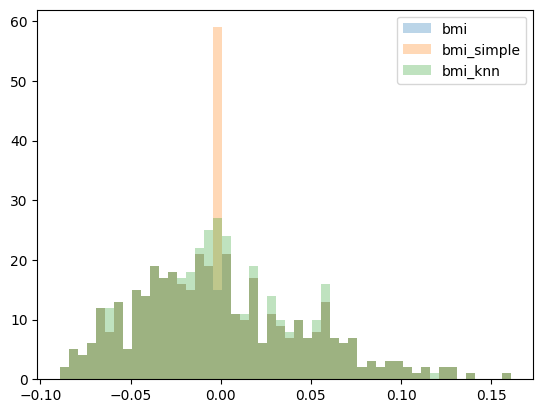

In [10]:
import matplotlib.pyplot as plt

plt.figure()
bins = 50
plt.hist(data['bmi'].dropna(), bins=bins, alpha=0.3, label='bmi')
plt.hist(data['bmi_simple'], bins=bins, alpha=0.3, label='bmi_simple')
plt.hist(data['bmi_knn'], bins=bins, alpha=0.3, label='bmi_knn')
plt.legend()
plt.show()